<a href="https://colab.research.google.com/github/wharshal11/AirBnB-Booking-Analysis/blob/main/Project_of_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

Airbnb is an online marketplace that connects people who want to rent out their homes with people who are looking for accommodations in that locale.




# First import all required Packages for EDA

In [1]:
import pandas as pd
import numpy as np
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("whitegrid",{'grid.linestyle': ''})
sns.set(rc={'figure.figsize':(16.7,8.27)})

# Load the Data for Analysis

In [2]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Copy of Airbnb NYC 2019.csv')

# Dataset Inspection

In [4]:
# # First Look
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23



# Dataset Information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

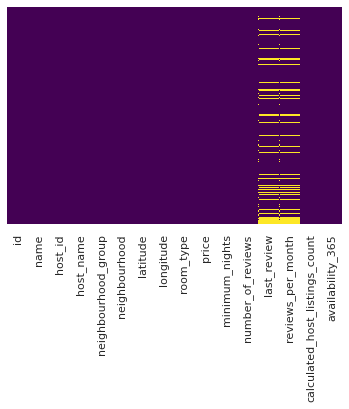

In [7]:
# Visualization of NaN Values with the help of HeatMap
sns.heatmap(df.isnull(),yticklabels= False,cbar = False , cmap='viridis')

By looking info of data and HeatMap. we can see number of things.

1.There are NaN value present in dataset.

2.Most number of NaN value present in last_review and 'review per_month' column

3.Dataset divided into numerical and catogorical datatype.

4.48895 rows and 16 colums

# Univariant analysis of Features

In [8]:
airbnb_df_with_na = df.copy()

# Column 1-name; column 2-host_id; column 3-host_name



In [9]:
# column 1 contain the name of the property which the host is giving on rent by which he can draw the customer's attention
print(f'There are total of {df.name.nunique()} unique property' )

There are total of 47905 unique property


In [10]:
# column 2 contain Host ID
print(f'There are total of {df.host_id.nunique()} unique host ID' )

There are total of 37457 unique host ID


In [11]:
# column 3 contain Host Name
print(f'There are total of {df.host_name.nunique()} unique host name' )

There are total of 11452 unique host name


Observations



1.  Column 3 contains all the unique names of hosts. We observe in all 11452 different hosts names in this database. 
2.  By comparing the unique numbers of host and host ID it can be concluded that there are many hosts with the same name.
3. So we will use host id for all further analysis.

# Column 4-**neighbourhood_group**

In [12]:
# Unique Neighbourhood
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

There are total of 6 neighbour area.
By ploting the countplot we can see which neighbour area has most number of rooms.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


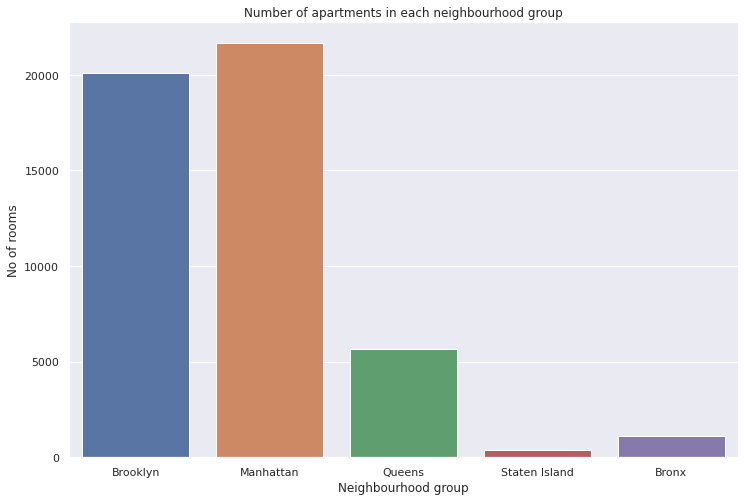

In [29]:
# Creating the Countplot
plt.figure(figsize=(12,8))
sns.countplot(df.neighbourhood_group, saturation=0.75)
plt.title('Number of apartments in each neighbourhood group')
plt.ylabel('No of rooms')
plt.xlabel('Neighbourhood group')
plt.show()

we can see that **Manhatten** has most of the rooms followed by **Brooklyn** and **Queens**